In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,classification_report
import io

from google.colab import files
uploaded = files.upload()

cancer = pd.read_csv(io.BytesIO(uploaded['breast-cancer-wisconsin.csv']))
print(cancer.head())
print(cancer.shape)

Saving breast-cancer-wisconsin.csv to breast-cancer-wisconsin (2).csv
   ID number  Clump Thickness  Unit Cell Size  Unit Cell Shape  Marg Adhesion  \
0    1000025                5               1                1              1   
1    1002945                5               4                4              5   
2    1015425                3               1                1              1   
3    1016277                6               8                8              1   
4    1017023                4               1                1              3   

   Single Epith Cell Size Bare Nuclei  Bland Chromatin  Normal Nucleoli  \
0                       2           1                3                1   
1                       7          10                3                2   
2                       2           2                3                1   
3                       3           4                3                7   
4                       2           1                3              

In [ ]:
display(cancer)

,ID number,Clump Thickness,Unit Cell Size,Unit Cell Shape,Marg Adhesion,Single Epith Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
!pip install pgmpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


The Class value has class 2 and 4. Value 2 and 4 represent benign and malignant class, respectively. Whereas all the other variables do vary between value 1 and 10, which are very much categorical in nature

Only the Bare Nuclei variable has some missing values, here we are replacing them with the most frequent value (category value 􀀓) in the following code:

In [ ]:
print(cancer.columns)


Index(['ID number', 'Clump Thickness', 'Unit Cell Size', 'Unit Cell Shape',
       'Marg Adhesion', 'Single Epith Cell Size', 'Bare Nuclei',
       'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')


In [ ]:
np.where(pd.isnull(cancer))

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
cancer['Bare Nuclei'] = cancer['Bare Nuclei'].replace('?', np.NAN)
cancer['Bare Nuclei'] = cancer['Bare Nuclei'].fillna(cancer['Bare Nuclei'].value_counts().index[0])

Use the following code to convert the classes to a 0 and 1 indicator for using in the classifier:

In [ ]:
cancer['Cancer Ind'] = 0
cancer.loc[cancer['Class']==4,'Cancer Ind'] = 1

In the following code, we are dropping non-value added variables from analysis:

In [ ]:
x_vars = cancer.drop(['ID number','Class','Cancer Ind'] ,axis=1)
print(x_vars)
print(type(x_vars))
y_var = cancer['Cancer Ind']
print(y_var)
from sklearn.model_selection import train_test_split

     Clump Thickness  Unit Cell Size  Unit Cell Shape  Marg Adhesion  \
0                  5               1                1              1   
1                  5               4                4              5   
2                  3               1                1              1   
3                  6               8                8              1   
4                  4               1                1              3   
..               ...             ...              ...            ...   
694                3               1                1              1   
695                2               1                1              1   
696                5              10               10              3   
697                4               8                6              4   
698                4               8                8              5   

     Single Epith Cell Size Bare Nuclei  Bland Chromatin  Normal Nucleoli  \
0                         2           1                3  

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_vars,y_var, train_size = 0.7,random_state=42)

In [ ]:
print(x_train)

     Clump Thickness  Unit Cell Size  Unit Cell Shape  Marg Adhesion  \
357                8              10               10              7   
648                5              10               10             10   
291                1               1                1              1   
420                3               2                2              3   
177                5              10               10              3   
..               ...             ...              ...            ...   
71                 6              10                2              8   
106               10              10               10              8   
270                8               4                7              1   
435               10               8               10              1   
102                4               1                2              1   

     Single Epith Cell Size Bare Nuclei  Bland Chromatin  Normal Nucleoli  \
357                      10          10                7  

In [ ]:
print(y_train)

357    1
648    1
291    0
420    0
177    1
      ..
71     1
106    1
270    1
435    1
102    0
Name: Cancer Ind, Length: 489, dtype: int64


In [ ]:
from pgmpy.estimators import BDeuScore, K2Score, BicScore
from pgmpy.models import BayesianModel

In [ ]:
print(type(x_train))
print(type(y_train))
data = x_train.join(y_train)
print(data)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
     Clump Thickness  Unit Cell Size  Unit Cell Shape  Marg Adhesion  \
357                8              10               10              7   
648                5              10               10             10   
291                1               1                1              1   
420                3               2                2              3   
177                5              10               10              3   
..               ...             ...              ...            ...   
71                 6              10                2              8   
106               10              10               10              8   
270                8               4                7              1   
435               10               8               10              1   
102                4               1                2              1   

     Single Epith Cell Size Bare Nuclei  Bland Chromatin  Nor

In [ ]:
#Calculating scores
bdeu = BDeuScore(data, equivalent_sample_size=10)
k2 = K2Score(data)
bic = BicScore(data)

The search space of DAGs is super-exponential in the number of variables and the above scoring functions allow for local maxima. The first property makes exhaustive search intractable for all but very small networks, the second prohibits efficient local optimization algorithms to always find the optimal structure. Thus, identifiying the ideal structure is often not tractable. Despite these bad news, heuristic search strategies often yields good results.

If only few nodes are involved (read: less than 5), ExhaustiveSearch can be used to compute the score for every DAG and returns the best-scoring one:

To obtain the Bayesian net structure that is the best model we use HillClimbSearch implements a greedy local search that starts from the DAG start (default: disconnected DAG) and proceeds by iteratively performing single-edge manipulations that maximally increase the score. The search terminates once a local maximum is found.

In [ ]:
from pgmpy.estimators import HillClimbSearch

hc = HillClimbSearch(data)
best_model = hc.estimate(scoring_method=bic)
print(sorted(best_model.nodes()))
print(best_model.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

['Bare Nuclei', 'Bland Chromatin', 'Cancer Ind', 'Clump Thickness', 'Marg Adhesion', 'Mitoses', 'Normal Nucleoli', 'Single Epith Cell Size', 'Unit Cell Shape', 'Unit Cell Size']
[('Bland Chromatin', 'Cancer Ind'), ('Cancer Ind', 'Unit Cell Size'), ('Cancer Ind', 'Unit Cell Shape'), ('Cancer Ind', 'Bare Nuclei'), ('Cancer Ind', 'Single Epith Cell Size'), ('Cancer Ind', 'Normal Nucleoli'), ('Cancer Ind', 'Clump Thickness'), ('Cancer Ind', 'Marg Adhesion'), ('Cancer Ind', 'Mitoses')]


In [ ]:
print(type(best_model))
from pgmpy.models import BayesianNetwork
model_final = BayesianNetwork(best_model)
print(type(model_final))

<class 'pgmpy.base.DAG.DAG'>
<class 'pgmpy.models.BayesianNetwork.BayesianNetwork'>


In [ ]:
from pgmpy.estimators import ParameterEstimator
#pe = ParameterEstimator(best_model, data)
from pgmpy.estimators import BayesianEstimator
model_final.fit(data, estimator=BayesianEstimator, prior_type="BDeu") # default equivalent_sample_size=5
for cpd in model_final.get_cpds():
    print(cpd)

+---------------------+-----------------------+----------------------+
| Cancer Ind          | Cancer Ind(0)         | Cancer Ind(1)        |
+---------------------+-----------------------+----------------------+
| Clump Thickness(1)  | 0.2968503937007874    | 0.018413597733711047 |
+---------------------+-----------------------+----------------------+
| Clump Thickness(2)  | 0.09527559055118111   | 0.007082152974504249 |
+---------------------+-----------------------+----------------------+
| Clump Thickness(3)  | 0.19291338582677164   | 0.05807365439093484  |
+---------------------+-----------------------+----------------------+
| Clump Thickness(4)  | 0.15511811023622046   | 0.05807365439093484  |
+---------------------+-----------------------+----------------------+
| Clump Thickness(5)  | 0.19921259842519684   | 0.18838526912181303  |
+---------------------+-----------------------+----------------------+
| Clump Thickness(6)  | 0.04173228346456693   | 0.05240793201133145  |
+-----

In [ ]:
import networkx as nx
import pylab as plt

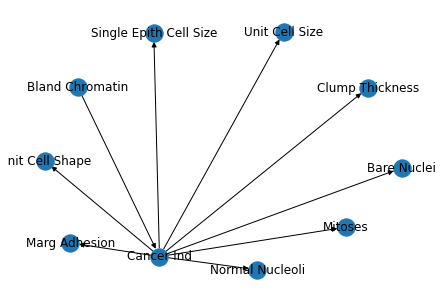

In [ ]:
#Printing the model using PyLab
nx.draw(model_final, with_labels=True)

In [ ]:
# Infering the posterior probability
from pgmpy.inference import VariableElimination

In [ ]:
from pandas.core.groupby.groupby import DataFrame
infer = VariableElimination(model_final)
#Evidence is needed to be given when we are evaluating posterior probability,
#We have to infer Cancer Ind from the other features
print(type(x_test))
print(type(y_test))
print(x_test.iat[0,0])
#['Bare Nuclei', 'Bland Chromatin', 'Cancer Ind', 'Clump Thickness', 'Marg Adhesion', 'Mitoses', 'Normal Nucleoli', 'Single Epith Cell Size', 'Unit Cell Shape', 'Unit Cell Size'
num_rows, num_cols = x_test.shape
print(num_rows)
posterior_py = np.empty(shape=(num_rows,2))
print(posterior_py.shape)
print(x_test.columns)
#print(infer.query(['Cancer Ind'], evidence={'Clump Thickness': x_test.iat[0,0], 'Unit Cell Size': x_test.iat[0,1], 'Unit Cell Shape': x_test.iat[0,2], 'Marg Adhesion': x_test.iat[0,3],'Single Epith Cell Size': x_test.iat[0,4],'Bare Nuclei': x_test.iat[0,5],'Bland Chromatin': x_test.iat[0,6],'Normal Nucleoli': x_test.iat[0,7], 'Mitoses': x_test.iat[0,8]}))
#Looking how the output looks like I attain the probability of cancer belonging to category 0 or 1
result = infer.query(['Cancer Ind'], evidence={'Bland Chromatin': x_test.iat[0,6]})
print(result)
#print(type(result))       
#print(result.values)
#print(type(result.values)) 
#print(result.values[0])
#print(result.values[1])
#posterior_py[0] =  result.values[0], result.values[1]
#print(posterior_py[0])                   
#print(infer.query(['Cancer Ind'], evidence={'Bland Chromatin': x_test.iat[0,6]}))#
#print(y_test.iloc[0])



<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
1
210
(210, 2)
Index(['Clump Thickness', 'Unit Cell Size', 'Unit Cell Shape', 'Marg Adhesion',
       'Single Epith Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses'],
      dtype='object')
+---------------+-------------------+
| Cancer Ind    |   phi(Cancer Ind) |
+===============+===================+
| Cancer Ind(0) |            0.9798 |
+---------------+-------------------+
| Cancer Ind(1) |            0.0202 |
+---------------+-------------------+


In [ ]:
for i in range(num_rows):
  try:
    print('Clump Thickness', x_train.iat[i,0], 'Unit Cell Size', x_train.iat[i,1], 'Unit Cell Shape', x_train.iat[i,2], 'Marg Adhesion', x_train.iat[i,3],'Single Epith Cell Size', x_train.iat[i,4],'Bare Nuclei', x_train.iat[i,5],'Bland Chromatin', x_train.iat[i,6],'Normal Nucleoli', x_train.iat[i,7], 'Mitoses',x_train.iat[i,8])
    #result = infer.query(['Cancer Ind'], evidence={'Clump Thickness': x_train.iat[i,0], 'Unit Cell Size': x_train.iat[i,1], 'Unit Cell Shape': x_train.iat[i,2], 'Marg Adhesion': x_train.iat[i,3],'Single Epith Cell Size': x_train.iat[i,4],'Bare Nuclei': x_train.iat[i,5],'Bland Chromatin': x_train.iat[i,6],'Normal Nucleoli': x_train.iat[i,7], 'Mitoses': x_train.iat[i,8]}))
    #I decided to only propagate the parent, since the other are children of the cancer indicator
    result = infer.query(['Cancer Ind'], evidence={'Bland Chromatin': x_test.iat[i,6]})
    posterior_py[i]= result.values[0],result.values[1]
  except KeyError as exception:
      print('KeyError: {} does not exist in the column {}.'.format(str(exception),i))
      continue


Clump Thickness 8 Unit Cell Size 10 Unit Cell Shape 10 Marg Adhesion 7 Single Epith Cell Size 10 Bare Nuclei 10 Bland Chromatin 7 Normal Nucleoli 3 Mitoses 8
Clump Thickness 5 Unit Cell Size 10 Unit Cell Shape 10 Marg Adhesion 10 Single Epith Cell Size 10 Bare Nuclei 2 Bland Chromatin 10 Normal Nucleoli 10 Mitoses 10
Clump Thickness 1 Unit Cell Size 1 Unit Cell Shape 1 Marg Adhesion 1 Single Epith Cell Size 2 Bare Nuclei 1 Bland Chromatin 3 Normal Nucleoli 1 Mitoses 1
Clump Thickness 3 Unit Cell Size 2 Unit Cell Shape 2 Marg Adhesion 3 Single Epith Cell Size 2 Bare Nuclei 3 Bland Chromatin 3 Normal Nucleoli 1 Mitoses 1
Clump Thickness 5 Unit Cell Size 10 Unit Cell Shape 10 Marg Adhesion 3 Single Epith Cell Size 8 Bare Nuclei 1 Bland Chromatin 5 Normal Nucleoli 10 Mitoses 3
Clump Thickness 10 Unit Cell Size 6 Unit Cell Shape 5 Marg Adhesion 8 Single Epith Cell Size 5 Bare Nuclei 10 Bland Chromatin 8 Normal Nucleoli 6 Mitoses 1
Clump Thickness 5 Unit Cell Size 1 Unit Cell Shape 1 Marg Ad

In [ ]:
print(posterior_py)

[[0.97982063 0.02017937]
 [0.95493562 0.04506438]
 [0.78502415 0.21497585]
 [0.78502415 0.21497585]
 [0.78502415 0.21497585]
 [0.78502415 0.21497585]
 [0.78502415 0.21497585]
 [0.19090909 0.80909091]
 [0.11261261 0.88738739]
 [0.78502415 0.21497585]
 [0.78502415 0.21497585]
 [0.78502415 0.21497585]
 [0.95493562 0.04506438]
 [0.78502415 0.21497585]
 [0.95493562 0.04506438]
 [0.01515152 0.98484848]
 [0.97982063 0.02017937]
 [0.19090909 0.80909091]
 [0.11261261 0.88738739]
 [0.01351351 0.98648649]
 [0.01351351 0.98648649]
 [0.95493562 0.04506438]
 [0.11261261 0.88738739]
 [0.97982063 0.02017937]
 [0.78502415 0.21497585]
 [0.78502415 0.21497585]
 [0.97982063 0.02017937]
 [0.11261261 0.88738739]
 [0.78502415 0.21497585]
 [0.11261261 0.88738739]
 [0.95493562 0.04506438]
 [0.97982063 0.02017937]
 [0.95493562 0.04506438]
 [0.11261261 0.88738739]
 [0.97982063 0.02017937]
 [0.95493562 0.04506438]
 [0.97982063 0.02017937]
 [0.01515152 0.98484848]
 [0.97982063 0.02017937]
 [0.78502415 0.21497585]


In [ ]:
#Getting the final vector to compare
print(type(y_train))
y_pred=list()
for i in range(num_rows):
  if posterior_py[i][0]>posterior_py[i][1]:
    y_pred.append(0) #The category zero was the one with the highest probability
  else:
    y_pred.append(1) #The category one was the one with the highest probability

<class 'pandas.core.series.Series'>


In [ ]:
ypred = pd.core.series.Series(y_pred)

In [ ]:
print(ypred)

0      0
1      0
2      0
3      0
4      0
      ..
205    0
206    0
207    0
208    0
209    0
Length: 210, dtype: int64


In [ ]:
import sklearn.metrics

In [ ]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       143
           1       0.89      0.76      0.82        67

    accuracy                           0.90       210
   macro avg       0.90      0.86      0.87       210
weighted avg       0.90      0.90      0.89       210

